In [97]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import datetime 


In [98]:
sf_data=pd.read_csv("D:/Data/Hourly_File_SWE.csv")

In [99]:
sf_data.head()

,Date,raw_count,temp,pressure,solar_cor,pressure_cor,corrected_count,one_day_moving_count,relative_count,mass_attenuation,SWE
0,11/13/2019 2:00,130.55,266.485375,533.000441,0.986,1.010351,130.0546484,130.2268973,0.840173531,0.07127614,2.443269584
1,11/13/2019 3:00,131.00,266.477875,532.900441,0.987,1.009608,130.5392768,130.1820005,0.839883874,0.071275588,2.448126304
2,11/13/2019 4:00,130.60,266.784375,532.800441,0.986,1.008866,129.9132686,130.1820005,0.839883874,0.071275588,2.448126304
3,11/13/2019 5:00,131.15,266.472375,532.850441,0.986,1.009237,130.5083493,130.2268973,0.840173531,0.07127614,2.443269584
4,11/13/2019 6:00,130.30,266.664875,533.200441,0.985,1.011837,129.8647855,130.3839178,0.841186567,0.071278053,2.426298087


In [100]:
sf_data["Date"]=pd.to_datetime(sf_data["Date"])

In [101]:
sf_data.dtypes

Date                    datetime64[ns]
raw_count                      float64
temp                           float64
pressure                       float64
solar_cor                      float64
pressure_cor                   float64
corrected_count                 object
one_day_moving_count            object
relative_count                  object
mass_attenuation                object
SWE                             object
dtype: object

In [102]:
#sf_data.set_index(sf_data["Date"], inplace=True)

<AxesSubplot:>

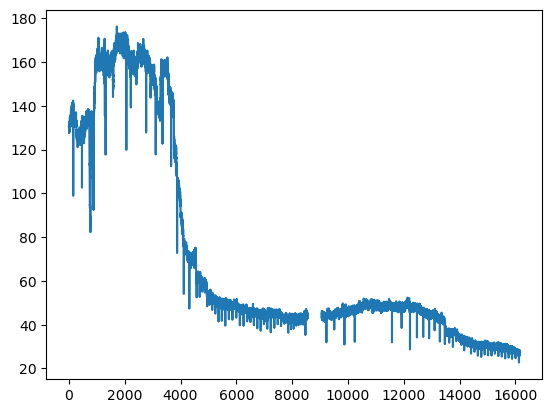

In [103]:
sf_data["raw_count"].plot()

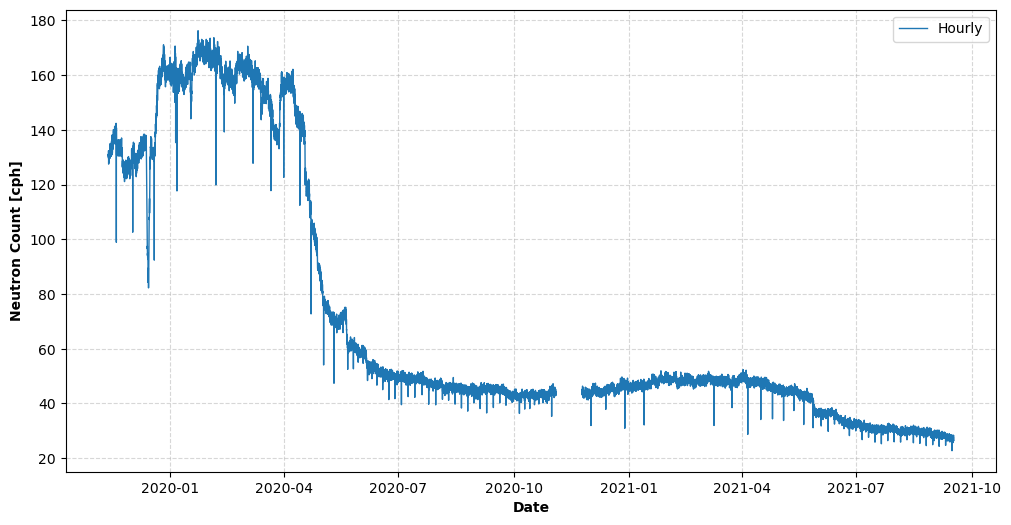

In [140]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(sf_data["Date"].values,sf_data["raw_count"].values, label="Hourly", linewidth=1)
ax.set_xlabel("Date",fontweight="bold")
ax.set_ylabel("Neutron Count [cph]", fontweight="bold")
ax.grid(alpha=0.5,linestyle='--')
ax.legend(loc="best")
plt.savefig("D:/Data/hourly_count.png",dpi=500, bbox_inches="tight", facecolor="white")

In [105]:
SWE=sf_data[["Date","SWE"]]

In [106]:
SWE.head()

,Date,SWE
0,2019-11-13 02:00:00,2.443269584
1,2019-11-13 03:00:00,2.448126304
2,2019-11-13 04:00:00,2.448126304
3,2019-11-13 05:00:00,2.443269584
4,2019-11-13 06:00:00,2.426298087


In [107]:
# Set 'date' column as index
SWE.set_index('Date', inplace=True)

In [108]:
start_date = "2019-12-01 01:00:00"
end_date = "2020-02-29 12:00:00"

In [109]:
# Convert to datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)


In [110]:
sel_swe=SWE[start_date:end_date]

In [111]:
sel_swe

,SWE
Date,
2019-12-01 01:00:00,3.563935291
2019-12-01 02:00:00,3.542008359
2019-12-01 03:00:00,3.542008359
2019-12-01 04:00:00,3.532273495
2019-12-01 05:00:00,3.532273495
...,...
2020-02-29 08:00:00,0.275987608
2020-02-29 09:00:00,0.267248192
2020-02-29 10:00:00,0.252296697


In [112]:
khare_ppt=pd.read_csv("D:/Data/Khare_hourly_final.csv")

In [113]:
khare_ppt.head()
khare_ppt.rename(columns={"Datetime": "Date"}, inplace=True)


In [114]:
khare_ppt["Date"]=pd.to_datetime(khare_ppt["Date"])

In [115]:
khare_ppt.set_index('Date', inplace=True)

In [117]:
sel_ppt=khare_ppt[start_date:end_date]

In [118]:
sel_ppt.head()

,Precipitation
Date,
2019-12-01 01:00:00,0.0
2019-12-01 02:00:00,0.0
2019-12-01 03:00:00,0.0
2019-12-01 04:00:00,0.0
2019-12-01 05:00:00,0.0


In [119]:
merged_df=sel_ppt.join(sel_swe)

In [120]:
merged_df.head()

,Precipitation,SWE
Date,,
2019-12-01 01:00:00,0.0,3.563935291
2019-12-01 02:00:00,0.0,3.542008359
2019-12-01 03:00:00,0.0,3.542008359
2019-12-01 04:00:00,0.0,3.532273495
2019-12-01 05:00:00,0.0,3.532273495


In [121]:
merged_df["SWE"]=pd.to_numeric(merged_df["SWE"], errors='coerce')

In [122]:
merged_df.dtypes

Precipitation    float64
SWE              float64
dtype: object

In [123]:
merged_df["SWE"] = merged_df["SWE"] * 10

In [124]:
merged_df.head()

,Precipitation,SWE
Date,,
2019-12-01 01:00:00,0.0,35.639353
2019-12-01 02:00:00,0.0,35.420084
2019-12-01 03:00:00,0.0,35.420084
2019-12-01 04:00:00,0.0,35.322735
2019-12-01 05:00:00,0.0,35.322735


In [125]:
merged_df["hourly_SWE"]=merged_df["SWE"].diff()

In [126]:
merged_df.head()

,Precipitation,SWE,hourly_SWE
Date,,,
2019-12-01 01:00:00,0.0,35.639353,NaN
2019-12-01 02:00:00,0.0,35.420084,-0.219269
2019-12-01 03:00:00,0.0,35.420084,0.000000
2019-12-01 04:00:00,0.0,35.322735,-0.097349
2019-12-01 05:00:00,0.0,35.322735,0.000000


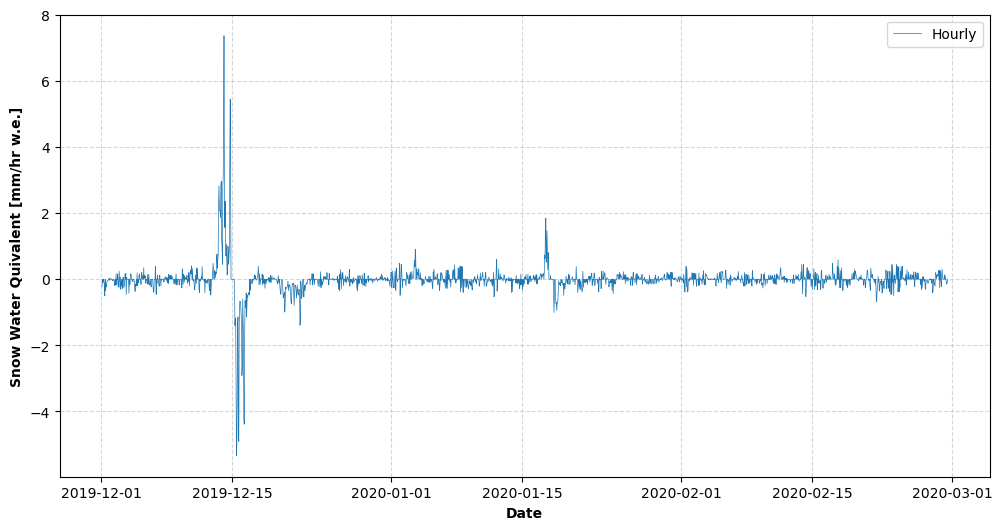

In [141]:
fig,ax=plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(12,6))
ax.plot(merged_df["hourly_SWE"],label="Hourly", linewidth=0.5)
ax.set_xlabel("Date",fontweight="bold")
ax.set_ylabel("Snow Water Quivalent [mm/hr w.e.]", fontweight="bold")
ax.grid(alpha=0.5,linestyle='--')
ax.legend(loc="best")
plt.savefig("D:/Datachange_SWE.png",dpi=500, bbox_inches="tight", facecolor="white")

In [85]:
ax[0].plot(merged_df["SWE"], linewidth=1,linestyle="-",color="blue",label="AWS-H$_{SnowFox}")